# Analyzing Star Wars Survey Data
## Introdution
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch? To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses.
### Goals
For this project, I'll be cleaning and exploring the data set
## Data
The data has several columns, including:

* `RespondentID` - An anonymized ID for the respondent (person taking the survey)
* `Gender` - The respondent's gender
* `Age` - The respondent's age
* `Household Income` - The respondent's income
* `Education` - The respondent's education level
* `Location (Census Region)` - The respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

I will read the data into a pandas dataframe and specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding.

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
#reviewing column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Data Cleaning
### Removing rows with invalid Respondent ID
RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. I'll have to remove them

In [3]:
#removing rows with an invalid Respondent ID
star_wars = star_wars[star_wars['RespondentID'].notnull()]

### Convert string columns to Boolean
Some columns are currently string types, because the main values they contain are Yes and No. I can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans will be easier to work with because I can select the rows that are True or False without having to do a string comparison. I'll do this for the following two columns:

* `Have you seen any of the 6 films in the Star Wars franchise? `
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

In [4]:
#creating a dictionary to define a mapping from each value in the columns to a new value
yes_no = {
        "Yes": True,
        "No": False
}

#calling the map function on the columns
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

#checking
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].head())
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].head())

1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool
1     True
2      NaN
3    False
4     True
5     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
* `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones.`
* `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith.`
* `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope.`
* `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back.`
* `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi.`

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. I'll assume that they didn't see the movie.

Again, I will convert these columns to a boolean then rename them to something more intuitive.

In [5]:
import numpy as np

episode_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(episode_map)

In [6]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


It looks like the changes have been made.

### Cleaning the Rankings Columns
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Since these columns are rank-based instead on Yes/No, I'll convert them to a numeric type and rename them.

In [7]:
#converting to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#renaming columns
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the Highest-Ranked Movie
Now that I've cleaned up the ranking columns, I can find the highest-ranked movie more quickly. I'll do this my taking the mean of each of the ranking columns and compare them using a bar chart.

In [8]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Text(0.5, 1.0, 'test')

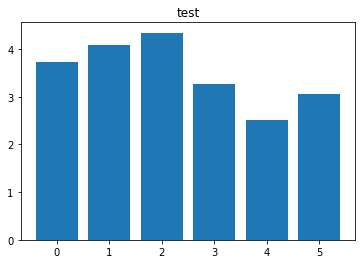

In [9]:
%matplotlib inline
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())
plt.title("test")

From the plot, it looks like the originial films/later episodes were ranked much higher than the newer/earlier episodes. A lower ranking means the movie was ranked best.

## Finding the Most Viewed Movie
I can figure out how many people have seen each movie just by taking the sum of the 'seen' columns (even though they contain Boolean values).

In [10]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

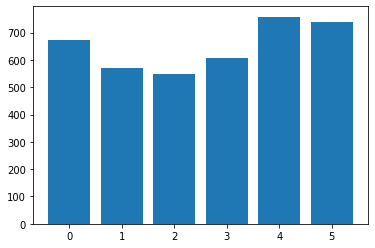

In [11]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

Not only were the original Star Wars films ranked the highest, but they were also seen the most compared to the newer films.

## Exploring the Data
### Analyzing Female and Male Respondents
I can split the data frame into two groups and see if the results from above are the same for women and men.

In [12]:
females = star_wars[star_wars["Gender"] == "Female"]
males = star_wars[star_wars["Gender"] == "Male"]

I'll analyze the female respondent data first.

In [13]:
females[females.columns[9:15]].mean()

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

<BarContainer object of 6 artists>

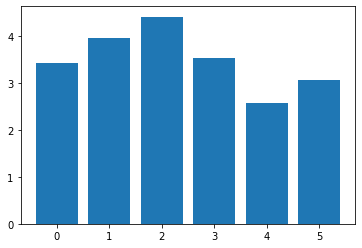

In [14]:
plt.bar(range(6), females[females.columns[9:15]].mean())

In [15]:
females[females.columns[3:9]].sum()

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

<BarContainer object of 6 artists>

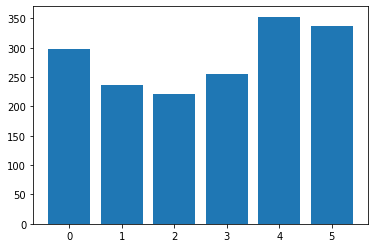

In [16]:
plt.bar(range(6), females[females.columns[3:9]].sum())

The results of the female segment are similar to the overall results calculated earlier. Now I'll examine the male segment.

In [17]:
males[males.columns[9:15]].mean()

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

<BarContainer object of 6 artists>

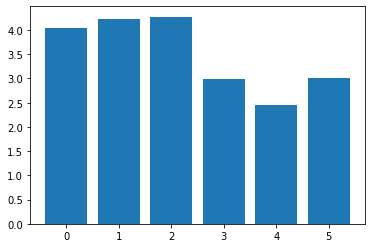

In [18]:
plt.bar(range(6), males[males.columns[9:15]].mean())

In [19]:
males[males.columns[3:9]].sum()

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

<BarContainer object of 6 artists>

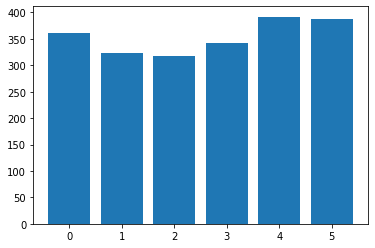

In [20]:
plt.bar(range(6), males[males.columns[3:9]].sum())

Based on the female and male segments and plots above, I've made the following findings:

* Men ranked Episodes 1-3 more critically than women but both ranked Episode 3 the worst.
* Both ranked Episode 5 the best although Men also ranked Episode 4 more favorable than Women.
* Episodes 5 and 6 were seen more by both Women and Men compared to other films in the franchise.
* More Men than Women have seen each film.

### Segmenting by Education
I'll now see if there are any interesting patterns present in the Education column.

In [21]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

To do:
* Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
* Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.

    * Which character do respondents like the most?
    * Which character do respondents dislike the most?
    * Which character is the most controversial (split between likes and dislikes)?